In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Input,Conv2D,GlobalMaxPool2D,MaxPooling2D,BatchNormalization

In [2]:
cifar=tensorflow.keras.datasets.cifar10

In [3]:
(X_train,y_train),(X_test,y_test)=cifar.load_data()

In [4]:
X_train,X_test=X_train/255.0,X_test/255.0

In [5]:
y_train,y_test=y_train.flatten(),y_test.flatten()

In [6]:
k=len(set(y_train))
k

10

In [7]:
i=Input(shape=X_train[0].shape)

x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)

x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)

x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)


x=Conv2D(128,(3,3),activation='relu',padding='SAME')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x=Flatten()(x)
x=Dropout(0.2)(x)

x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)

x=Dense(k,activation='softmax')(x)

model=Model(i,x)

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 23s 11ms/step - loss: 1.3097 - accuracy: 0.5533 - val_loss: 0.9546 - val_accuracy: 0.6684
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8346 - accuracy: 0.7116 - val_loss: 0.7674 - val_accuracy: 0.7426
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6901 - accuracy: 0.7634 - val_loss: 0.8834 - val_accuracy: 0.7093
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5793 - accuracy: 0.8010 - val_loss: 0.7114 - val_accuracy: 0.7631
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4936 - accuracy: 0.8307 - val_loss: 0.6038 - val_accuracy: 0.8004
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4162 - accuracy: 0.8573 - val_loss: 0.6645 - val_accuracy: 0.7910
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3522 - accuracy: 0.8788 - val_loss: 0.6815 -

In [11]:
#it will continue training from where it was left at batch 10
batch_size=64
data_generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator=data_generator.flow(X_train,y_train,batch_size)
steps_per_epochs=X_train.shape[0]
model.fit(train_generator,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
782/782 [==============================] - 21s 25ms/step - loss: 0.5548 - accuracy: 0.8167 - val_loss: 0.5662 - val_accuracy: 0.8177
Epoch 2/15
782/782 [==============================] - 20s 25ms/step - loss: 0.4814 - accuracy: 0.8372 - val_loss: 0.5157 - val_accuracy: 0.8384
Epoch 3/15
782/782 [==============================] - 19s 25ms/step - loss: 0.4489 - accuracy: 0.8493 - val_loss: 0.4966 - val_accuracy: 0.8379
Epoch 4/15
782/782 [==============================] - 20s 25ms/step - loss: 0.4251 - accuracy: 0.8563 - val_loss: 0.5053 - val_accuracy: 0.8354
Epoch 5/15
782/782 [==============================] - 20s 25ms/step - loss: 0.4043 - accuracy: 0.8635 - val_loss: 0.5794 - val_accuracy: 0.8220
Epoch 6/15
782/782 [==============================] - 20s 25ms/step - loss: 0.3887 - accuracy: 0.8683 - val_loss: 0.4450 - val_accuracy: 0.8513
Epoch 7/15
782/782 [==============================] - 19s 25ms/step - loss: 0.3758 - accuracy: 0.8721 - val_loss: 0.4797 - val_accuracy:

<AxesSubplot: >

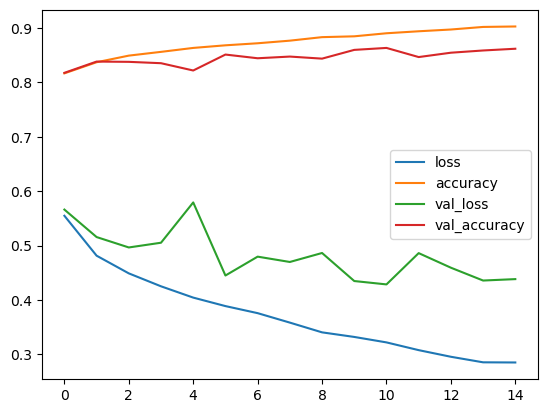

In [12]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [13]:
predictions=model.predict(X_test,batch_size=64).argmax(axis=1)

157/157 [==============================] - 1s 5ms/step


In [14]:
cm=tensorflow.math.confusion_matrix(labels=y_test,predictions=predictions)

In [15]:
labels='''airplane automobile bird cat deer dog frog horse ship truck'''.split()

In [16]:
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

labels=labels.map({'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9})

<AxesSubplot: >

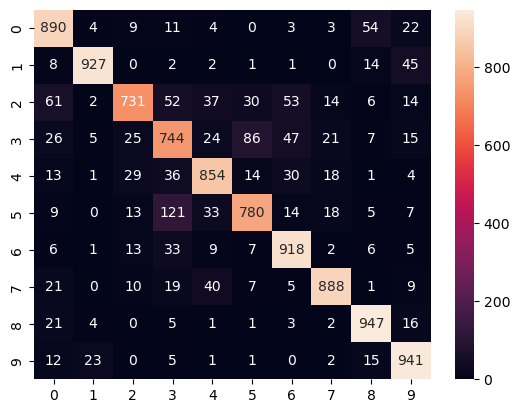

In [17]:
sns.heatmap(cm,annot=True,fmt='d')

Text(0.5, 1.0, 'True: bird predicted: frog')

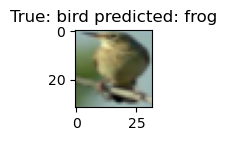

In [18]:
plt.figure(figsize=(1,1))
misclassifies_idx=np.where(predictions!=y_test)[0]
i=np.random.choice(misclassifies_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title('True: %s predicted: %s' %(labels[y_test[i]],labels[predictions[i]]))

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.96      0.93      0.94      1000
           2       0.88      0.73      0.80      1000
           3       0.72      0.74      0.73      1000
           4       0.85      0.85      0.85      1000
           5       0.84      0.78      0.81      1000
           6       0.85      0.92      0.89      1000
           7       0.92      0.89      0.90      1000
           8       0.90      0.95      0.92      1000
           9       0.87      0.94      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

